<a href="https://colab.research.google.com/github/scorepia/TraditionalMLvsMLP/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import module and Libraries


In [16]:
import pandas as pd
import tensorflow as tf
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV


%matplotlib inline

Import dataset


In [17]:
df_train = pd.read_csv('/content/income_train.csv')

EDA


In [18]:
df_train.describe()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,21978.000000,0.429079,0.422717,0.127263,0.685617,0.629632,0.436320,0.459993,0.288500,0.916896,0.668835,0.010936,0.020259,0.408159,0.889650,0.239279
std,12689.437228,0.152604,0.198095,0.071002,0.258607,0.160943,0.251166,0.308901,0.320271,0.211570,0.470637,0.075706,0.092881,0.125256,0.147982,0.426648
min,0.000000,0.188889,0.000000,0.009053,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000
25%,10989.000000,0.311111,0.375000,0.078835,0.600000,0.562500,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.404040,0.926829,0.000000
50%,21978.000000,0.411111,0.375000,0.119498,0.733333,0.625000,0.333333,0.428571,0.200000,1.000000,1.000000,0.000000,0.000000,0.404040,0.926829,0.000000
75%,32967.000000,0.533333,0.375000,0.159468,0.800000,0.750000,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.454545,0.926829,0.000000
max,43956.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       43957 non-null  int64  
 1   age              43957 non-null  float64
 2   workclass        43957 non-null  float64
 3   fnlwgt           43957 non-null  float64
 4   education        43957 non-null  float64
 5   educational-num  43957 non-null  float64
 6   marital-status   43957 non-null  float64
 7   occupation       43957 non-null  float64
 8   relationship     43957 non-null  float64
 9   race             43957 non-null  float64
 10  gender           43957 non-null  float64
 11  capital-gain     43957 non-null  float64
 12  capital-loss     43957 non-null  float64
 13  hours-per-week   43957 non-null  float64
 14  native-country   43957 non-null  float64
 15  income_>50K      43957 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 5.4 MB


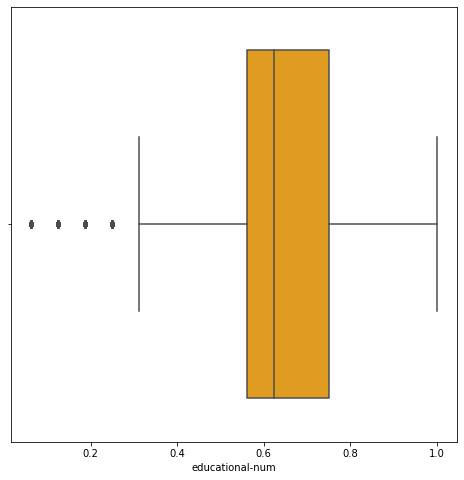

In [20]:
fig,ax = plt.subplots(figsize = (8,8))
sns.boxplot(data=df_train,x='educational-num',color='orange')

In [21]:
df_train

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0,0.744444,0.375,0.245857,0.666667,1.0000,0.000000,0.214286,0.2,1.0,1.0,1.0,0.0,0.606061,0.926829,1.0
1,1,0.188889,0.375,0.164118,0.133333,0.5000,0.666667,0.500000,0.6,1.0,1.0,0.0,0.0,0.151515,0.926829,0.0
2,2,0.344444,0.375,0.116882,0.600000,0.8125,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829,1.0
3,3,0.644444,0.750,0.073939,0.333333,0.2500,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829,0.0
4,4,0.277778,0.750,0.100140,1.000000,0.6250,0.666667,0.500000,0.2,0.5,1.0,0.0,0.0,0.404040,0.926829,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,43952,0.577778,0.375,0.046284,0.600000,0.8125,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.505051,0.926829,1.0
43953,43953,0.211111,0.375,0.078209,0.733333,0.5625,0.666667,0.500000,0.6,1.0,0.0,0.0,0.0,0.404040,0.926829,0.0
43954,43954,0.333333,0.375,0.132815,1.000000,0.6250,0.000000,0.785714,0.2,1.0,1.0,0.0,0.0,0.585859,0.926829,0.0
43955,43955,0.511111,0.375,0.065676,0.600000,0.8125,0.666667,0.785714,0.2,1.0,0.0,0.0,0.0,0.353535,0.926829,0.0


In [22]:
#pretrain dataset

from sklearn.model_selection import train_test_split 

x=df_train.drop(['income_>50K'],axis=1)
y=df_train['income_>50K'].astype('int32')

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0) 
x_train

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4300,4300,0.644444,0.375,0.140515,0.200000,0.1250,0.333333,0.500000,0.0,1.00,1.0,0.00000,0.0,0.383838,0.097561
28923,28923,0.488889,0.375,0.069767,1.000000,0.6250,0.000000,0.642857,0.6,1.00,1.0,0.03325,0.0,0.353535,0.926829
23176,23176,0.400000,0.375,0.067980,1.000000,0.6250,0.500000,0.642857,0.2,0.25,0.0,0.00000,0.0,0.404040,0.048780
1671,1671,0.633333,0.375,0.091322,0.400000,0.3125,0.333333,0.142857,0.0,0.50,1.0,0.00000,0.0,0.404040,0.926829
30355,30355,0.244444,0.375,0.103611,1.000000,0.6250,0.000000,0.785714,0.6,0.25,0.0,0.00000,0.0,0.303030,0.707317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,30403,0.477778,0.625,0.139277,0.666667,1.0000,0.333333,0.642857,0.0,1.00,1.0,0.00000,0.0,0.424242,0.926829
21243,21243,0.577778,0.375,0.175090,0.000000,0.3750,1.000000,0.428571,0.8,0.50,0.0,0.00000,0.0,0.404040,0.926829
42613,42613,0.555556,0.750,0.135207,0.733333,0.5625,0.000000,0.000000,0.6,1.00,0.0,0.00000,0.0,0.404040,0.926829
43567,43567,0.433333,0.375,0.231309,1.000000,0.6250,0.333333,0.000000,0.6,0.50,0.0,0.00000,0.0,0.505051,0.926829


In [23]:
y_train

4300     0
28923    0
23176    1
1671     1
30355    0
        ..
30403    1
21243    0
42613    0
43567    1
2732     0
Name: income_>50K, Length: 26374, dtype: int32

In [29]:
#kfold n = 5
kfold = StratifiedKFold(n_splits=5)

def cross_validate_score_(model,kfold,model_name):
    #evaluate scoreing
    evaluate_method = ['accuracy','f1','recall','precision']
    evaluate_list = []
    for ev in evaluate_method:       
        cv_score = cross_val_score(estimator=model,
                                        X=x_train,
                                        y=y_train,
                                        cv=kfold,
                                        n_jobs=4,
                                        scoring=ev)
        evaluate_list.append(cv_score)
    print(evaluate_list)
    df_cv = pd.DataFrame({
        'Model': model_name,
        'Accuracy' : evaluate_list[0],
        'F1 Score' : evaluate_list[1],
        'Recall': evaluate_list[2],
        'Precision' :  evaluate_list[3],
    },index=[int(n) for n in range(1,6)])
    
    return df_cv

In [25]:
cross_validate_score_(model=KNeighborsClassifier(),kfold=kfold,model_name='KNN')

[array([0.7078673 , 0.71279621, 0.71545024, 0.70843602, 0.70098597]), array([0.1279004 , 0.13969336, 0.13785181, 0.12811791, 0.11751539]), array([0.08869702, 0.09654631, 0.09411765, 0.08862745, 0.08241758]), array([0.22920892, 0.25256674, 0.25751073, 0.23108384, 0.20467836])]


,Model,Accuracy,F1 Score,Recall,Precision
1,KNN,0.707867,0.127900,0.088697,0.229209
2,KNN,0.712796,0.139693,0.096546,0.252567
3,KNN,0.715450,0.137852,0.094118,0.257511
4,KNN,0.708436,0.128118,0.088627,0.231084
5,KNN,0.700986,0.117515,0.082418,0.204678


In [26]:
KNN = KNeighborsClassifier()

#Search grid for optimal parameters
KNN_params_grid = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

gsKNN = GridSearchCV(KNN, param_grid= KNN_params_grid, cv = kfold,scoring = "accuracy",verbose=1)

gsKNN.fit(x_train,y_train)

KNN_best = gsKNN.best_estimator_

# Best score
gsKNN.best_score_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


0.7568817646075624

In [27]:
gsKNN.best_params_

{'leaf_size': 1, 'n_neighbors': 20}

In [30]:
# make predictions on test data

y_pred = KNN_best.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_pred, y_test)))

XGBoost model accuracy score: 0.7626


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     17541
           1       0.00      0.17      0.00        42

    accuracy                           0.76     17583
   macro avg       0.50      0.47      0.43     17583
weighted avg       1.00      0.76      0.86     17583

